In [6]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ----------

Файл 'coment.csv' успешно загружен.
Названия столбцов в DataFrame:
Index(['comment', 'rating', 'Вопрос решен',
       'Нравится качество выполнения заявки',
       'Нравится качество работы сотрудников',
       'Нравится скорость отработки заявок', 'Понравилось выполнение заявки',
       'Проблемы'],
      dtype='object')
Список категорий:
['Вопрос решен', 'Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Нравится скорость отработки заявок', 'Понравилось выполнение заявки', 'Проблемы']


d:\мои проекты\intensiv4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\мои проекты\intensiv4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "d:\мои проекты\intensiv4\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\мои проекты\intensiv4\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\мои проекты\intensiv4\.venv

Best parameters: {'estimator__C': 0.01}
ROC-AUC for Вопрос решен: 0.9457947530864197
ROC-AUC for Нравится качество выполнения заявки: 0.6765942879499217
ROC-AUC for Нравится качество работы сотрудников: 0.7424176831597443
ROC-AUC for Нравится скорость отработки заявок: 0.9252947182771744
ROC-AUC for Понравилось выполнение заявки: 0.6659383295895446
ROC-AUC for Проблемы: 0.9727255859978972
Mean ROC-AUC: 0.821460893010117


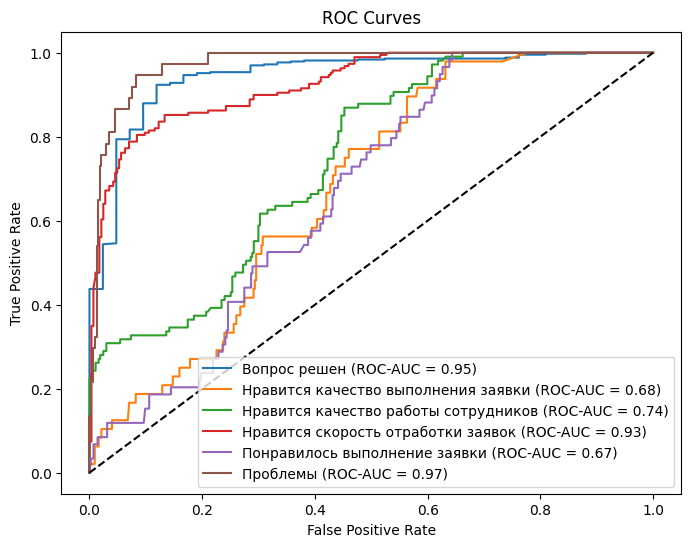

Модель сохранена в файл 'multilabel_model.pkl'


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib
import os

# 1. Загрузка данных
data = None
file_path = r"D:\мои проекты\intensiv4\coment.csv"

try:
    data = pd.read_csv(file_path, encoding='utf-8')
    print(f"Файл '{os.path.basename(file_path)}' успешно загружен.")

    # Удаление пробелов из названий столбцов
    data.columns = data.columns.str.strip()

    print("Названия столбцов в DataFrame:")
    print(data.columns)

except FileNotFoundError:
    print(f"Ошибка: Файл '{os.path.basename(file_path)}' не найден. Проверьте путь: {file_path}")
    exit()
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    exit()

# 2. Подготовка данных
if data is None:
    print("Не удалось загрузить данные. Завершение работы.")
    exit()

# Заполняем пропущенные значения
data['comment'] = data['comment'].fillna('')

# Целевые переменные (категории)
categories = ['Вопрос решен', 'Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Нравится скорость отработки заявок', 'Понравилось выполнение заявки', 'Проблемы']

# Удаление пробелов из элементов списка категорий
categories = [cat.strip() for cat in categories]

print("Список категорий:")
print(categories)

# Преобразование типов данных столбцов-категорий в строковый тип
for col in categories:
    data[col] = data[col].astype(str)

# Проверка наличия столбцов в DataFrame
missing_columns = [cat for cat in categories if cat not in data.columns]
if missing_columns:
    print(f"Ошибка: Отсутствуют следующие столбцы в DataFrame: {missing_columns}")
    print("Проверьте названия столбцов в файле и в списке категорий.")
    exit()

# Разделение на признаки (X) и цели (y)
X = data['comment']
y = data[categories]

# 3. Векторизация текста
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# 4. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 5. Обучение модели
# Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)
multilabel_classifier = MultiOutputClassifier(logreg)

# Подбор гиперпараметров (пример)
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100] # Расширили диапазон C
}

grid_search = GridSearchCV(multilabel_classifier, param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# 6. Оценка модели
# Предсказание вероятностей
y_pred_proba = best_model.predict_proba(X_test)

# Вычисление ROC-AUC для каждой категории
roc_auc = {}
for i, category in enumerate(categories):
    try:
        roc_auc[category] = roc_auc_score(y_test[category], y_pred_proba[i][:, 1])
        print(f"ROC-AUC for {category}: {roc_auc[category]}")
    except Exception as e:
        print(f"Ошибка при вычислении ROC-AUC для категории {category}: {e}")

# Средний ROC-AUC
mean_roc_auc = sum(roc_auc.values()) / len(roc_auc) if roc_auc else 0
print(f"Mean ROC-AUC: {mean_roc_auc}")

# Визуализация ROC-кривых (пример)
plt.figure(figsize=(8, 6))
for i, category in enumerate(categories):
    try:
        # Преобразуем y_test[category] в числовой тип
        y_test_numeric = y_test[category].astype(float)
        fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_proba[i][:, 1])
        plt.plot(fpr, tpr, label=f'{category} (ROC-AUC = {roc_auc[category]:.2f})')
    except Exception as e:
        print(f"Ошибка при построении ROC-кривой для категории {category}: {e}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# 7. Сохранение модели
joblib.dump(best_model, 'multilabel_model.pkl')

print("Модель сохранена в файл 'multilabel_model.pkl'")

<>:13: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_16740\3106046152.py:13: SyntaxWarning: invalid escape sequence '\i'
  data = pd.read_csv("D:\мои проекты\intensiv4\DADA\categorized_comments.csv", encoding='utf-8')


Файл 'categorized_comments.csv' успешно загружен.
Best parameters: {'estimator__C': 10}
ROC-AUC for speed: 0.993156353450471
ROC-AUC for quality: 0.9979839779298636
ROC-AUC for staff: 0.978244561140285
ROC-AUC for execution: 0.9960492679525912
ROC-AUC for solved: 0.9931678053657724
Mean ROC-AUC: 0.9917203931677967


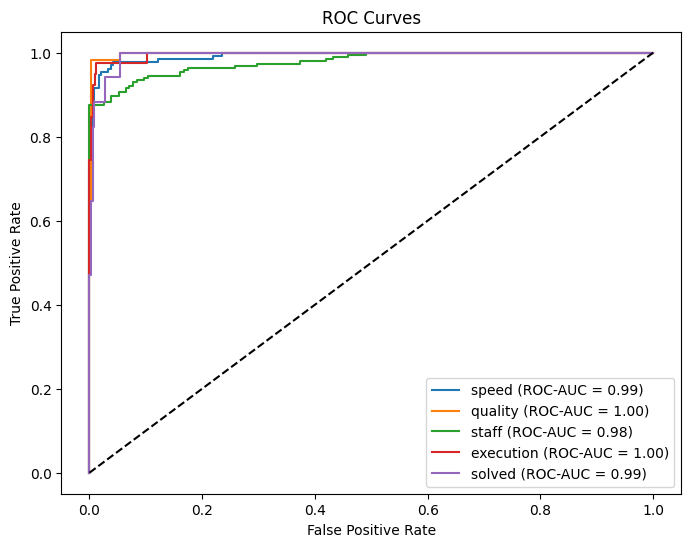

Модель сохранена в файл 'multilabel_model.pkl'


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier  # Исправленный импорт
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

# 1. Загрузка данных
data = None  # Инициализируем data значением None
try:
    data = pd.read_csv("D:\мои проекты\intensiv4\DADA\categorized_comments.csv", encoding='utf-8')
    print("Файл 'categorized_comments.csv' успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'categorized_comments.csv' не найден. Сначала запусти скрипт категоризации!")
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")

if data is None:
    print("Не удалось загрузить данные. Завершение работы.")
    exit()

# 2. Подготовка данных
# Заполняем пропущенные значения
data['comment'] = data['comment'].fillna('')

# Целевые переменные (категории)
categories = ['speed', 'quality', 'staff', 'execution', 'solved']

# Разделение на признаки (X) и цели (y)
X = data['comment']
y = data[categories]

# 3. Векторизация текста
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# 4. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 5. Обучение модели
# Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)
multilabel_classifier = MultiOutputClassifier(logreg)

# Подбор гиперпараметров (пример)
param_grid = {
    'estimator__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(multilabel_classifier, param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# 6. Оценка модели
# Предсказание вероятностей
y_pred_proba = best_model.predict_proba(X_test)

# Вычисление ROC-AUC для каждой категории
roc_auc = {}
for i, category in enumerate(categories):
    roc_auc[category] = roc_auc_score(y_test[category], y_pred_proba[i][:, 1])
    print(f"ROC-AUC for {category}: {roc_auc[category]}")

# Средний ROC-AUC
mean_roc_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Mean ROC-AUC: {mean_roc_auc}")

# Визуализация ROC-кривых (пример)
plt.figure(figsize=(8, 6))
for i, category in enumerate(categories):
    fpr, tpr, thresholds = roc_curve(y_test[category], y_pred_proba[i][:, 1])
    plt.plot(fpr, tpr, label=f'{category} (ROC-AUC = {roc_auc[category]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# 7. Сохранение модели
joblib.dump(best_model, 'multilabel_model.pkl')

print("Модель сохранена в файл 'multilabel_model.pkl'")

Logistic Regression.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt  # Импортируем matplotlib для визуализации

# 1. Загрузка данных
try:
    data = pd.read_csv("D:\мои проекты\intensiv4\DADA\categorized_comments.csv", encoding='utf-8')  # Загружаем исходный файл
    print("Файл 'coment.csv' успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'coment.csv' не найден.")
    exit()
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    exit()

# 2. Подготовка данных
# Проверяем наличие необходимых столбцов
required_columns = ['comment', 'Нравится скорость отработки заявок', 'Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Понравилось выполнение заявки', 'Вопрос решен']
for col in required_columns:
    if col not in data.columns:
        print(f"Ошибка: Столбец '{col}' не найден в файле 'coment.csv'.")
        exit()

# Переименование столбца "Текст комментария" в "comment"
data = data.rename(columns={'Текст комментария': 'comment'})

# Заполняем пропущенные значения в столбце 'comment'
data['comment'] = data['comment'].fillna('')

# Определяем целевые переменные
categories = ['Нравится скорость отработки заявок', 'Нравится качество выполнения заявки', 'Нравится качество работы сотрудников', 'Понравилось выполнение заявки', 'Вопрос решен']

# 3. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data['comment'], data[categories], test_size=0.2, random_state=42)

# 4. Создание пайплайна
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultiOutputClassifier(LogisticRegression(solver='liblinear', random_state=42)))
])

# 5. Обучение модели
pipeline.fit(X_train, y_train)

# 6. Оценка модели
y_pred_proba = pipeline.predict_proba(X_test)

roc_auc = {}
fpr = {}
tpr = {}

# Создаем фигуру для графиков ROC-кривых
plt.figure(figsize=(10, 8))

for i, category in enumerate(categories):
    roc_auc[category] = roc_auc_score(y_test[category], y_pred_proba[i][:, 1])
    fpr[category], tpr[category], _ = roc_curve(y_test[category], y_pred_proba[i][:, 1])

    # Рисуем ROC-кривую для каждой категории
    plt.plot(fpr[category], tpr[category], label=f'{category} (AUC = {roc_auc[category]:.2f})')

    print(f"ROC-AUC for {category}: {roc_auc[category]}")

mean_roc_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Mean ROC-AUC: {mean_roc_auc}")

# Рисуем диагональную линию (случайный классификатор)
plt.plot([0, 1], [0, 1], 'k--')

# Настраиваем график
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Category')
plt.legend()
plt.grid(True)  # Добавляем сетку для лучшей читаемости

# Отображаем график
plt.show()

# 7. Сохранение модели
joblib.dump(pipeline, 'comment_classification_model.pkl')
print("Модель сохранена в файл 'comment_classification_model.pkl'")

In [1]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 2.7 MB/s eta 0:00:55
   ---------------------------------------- 1.3/150.0 MB 2.9 MB/s eta 0:00:52
    --------------------------------------- 2.1/150.0 MB 3.2 MB/s eta 0:00:47
    --------------------------------------- 3.1/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 3.9/150.0 MB 3.5 MB/s eta 0:00:43
   - -------------------------------------- 4.5/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 5.2/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 5.8/150.0 MB 3.3 MB/s eta 0:00:44
   - -------------------------------------- 6.3/150.0 MB 3.3 MB/s eta 0:00:44
   - -------------------------------------- 6.8/150.0 MB 3.2 MB/s eta 0:00:45
   - -------------------------------------- 7.3/150.0 MB 3.1 MB/s eta 0:00:46


Файл 'categorized_comments.csv' успешно загружен.
Fitting 3 folds for each of 8 candidates, totalling 24 fits


d:\мои проекты\intensiv4\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:52:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\мои проекты\intensiv4\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:52:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\мои проекты\intensiv4\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:52:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\мои проекты\intensiv4\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:52:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not

Best parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 200}
ROC-AUC for speed: 0.9691876750700279
ROC-AUC for quality: 0.9920420181441987
ROC-AUC for staff: 0.966046511627907
ROC-AUC for execution: 0.9951971492756991
ROC-AUC for solved: 0.9483419430094984
Mean ROC-AUC: 0.9741630594254662


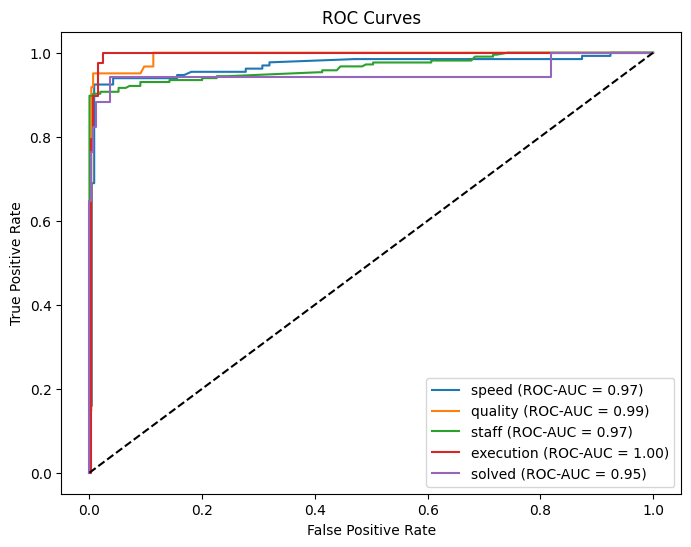

Модель сохранена в файл 'multilabel_xgboost_model.pkl'


In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib
from sklearn.multioutput import MultiOutputClassifier

# 1. Загрузка данных
try:
    data = pd.read_csv("D:\\мои проекты\\intensiv4\\DADA\\categorized_comments.csv", encoding='utf-8')
    print("Файл 'categorized_comments.csv' успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'categorized_comments.csv' не найден. Сначала запусти скрипт категоризации!")
    exit()
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    exit()

# 2. Подготовка данных
# Заполняем пропущенные значения
data['comment'] = data['comment'].fillna('')

# Целевые переменные (категории)
categories = ['speed', 'quality', 'staff', 'execution', 'solved']

# Разделение на признаки (X) и цели (y)
X = data['comment']
y = data[categories]

# 3. Векторизация текста
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# 4. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 5. Обучение модели
# XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
multilabel_classifier = MultiOutputClassifier(xgb_model)

# Подбор гиперпараметров (пример)
param_grid = {
    'estimator__n_estimators': [100, 200],  # Количество деревьев
    'estimator__learning_rate': [0.1, 0.01],  # Скорость обучения
    'estimator__max_depth': [3, 5]  # Максимальная глубина дерева
}

grid_search = GridSearchCV(multilabel_classifier, param_grid, scoring='roc_auc', cv=3, verbose=1)  # Добавлен verbose
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# 6. Оценка модели
# Предсказание вероятностей
y_pred_proba = best_model.predict_proba(X_test)

# Вычисление ROC-AUC для каждой категории
roc_auc = {}
for i, category in enumerate(categories):
    roc_auc[category] = roc_auc_score(y_test[category], y_pred_proba[i][:, 1])
    print(f"ROC-AUC for {category}: {roc_auc[category]}")

# Средний ROC-AUC
mean_roc_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Mean ROC-AUC: {mean_roc_auc}")

# Визуализация ROC-кривых (пример)
plt.figure(figsize=(8, 6))
for i, category in enumerate(categories):
    fpr, tpr, thresholds = roc_curve(y_test[category], y_pred_proba[i][:, 1])
    plt.plot(fpr, tpr, label=f'{category} (ROC-AUC = {roc_auc[category]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# 7. Сохранение модели
joblib.dump(best_model, 'multilabel_xgboost_model.pkl')

print("Модель сохранена в файл 'multilabel_xgboost_model.pkl'")

Файл 'categorized_comments.csv' успешно загружен.
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'estimator__max_depth': None, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
ROC-AUC for speed: 0.9899573465749936
ROC-AUC for quality: 0.9959679558597273
ROC-AUC for staff: 0.9820255063765942
ROC-AUC for execution: 0.9972499806336665
ROC-AUC for solved: 0.9935010831528078
Mean ROC-AUC: 0.9917403745195579


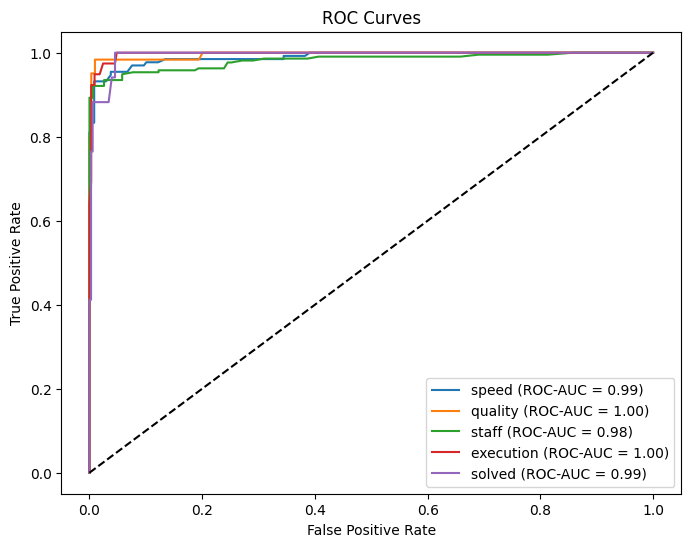

Модель сохранена в файл 'multilabel_random_forest_model.pkl'


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib
from sklearn.multioutput import MultiOutputClassifier

# 1. Загрузка данных
try:
    data = pd.read_csv("D:\\мои проекты\\intensiv4\\DADA\\categorized_comments.csv", encoding='utf-8')
    print("Файл 'categorized_comments.csv' успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'categorized_comments.csv' не найден. Сначала запусти скрипт категоризации!")
    exit()
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    exit()

# 2. Подготовка данных
# Заполняем пропущенные значения
data['comment'] = data['comment'].fillna('')

# Целевые переменные (категории)
categories = ['speed', 'quality', 'staff', 'execution', 'solved']

# Разделение на признаки (X) и цели (y)
X = data['comment']
y = data[categories]

# 3. Векторизация текста
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# 4. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 5. Обучение модели
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
multilabel_classifier = MultiOutputClassifier(rf_model)

# Подбор гиперпараметров (пример)
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 5, 10],
    'estimator__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(multilabel_classifier, param_grid, scoring='roc_auc', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# 6. Оценка модели
# Предсказание вероятностей
y_pred_proba = best_model.predict_proba(X_test)

# Вычисление ROC-AUC для каждой категории
roc_auc = {}
for i, category in enumerate(categories):
    roc_auc[category] = roc_auc_score(y_test[category], y_pred_proba[i][:, 1])
    print(f"ROC-AUC for {category}: {roc_auc[category]}")

# Средний ROC-AUC
mean_roc_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Mean ROC-AUC: {mean_roc_auc}")

# Визуализация ROC-кривых (пример)
plt.figure(figsize=(8, 6))
for i, category in enumerate(categories):
    fpr, tpr, thresholds = roc_curve(y_test[category], y_pred_proba[i][:, 1])
    plt.plot(fpr, tpr, label=f'{category} (ROC-AUC = {roc_auc[category]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# 7. Сохранение модели
joblib.dump(best_model, 'multilabel_random_forest_model.pkl')

print("Модель сохранена в файл 'multilabel_random_forest_model.pkl'")

In [6]:
%pip install transformers scikit-learn pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install transformers

  Using cached transformers-4.52.2-py3-none-any.whl.metadata (40 kB)
Using cached transformers-4.52.2-py3-none-any.whl (10.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install scikit-learn
%pip install matplotlib
%pip install joblib
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
%pip install numpy

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl (12.6 MB)
Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl (41.0 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- ------------------------------- 1/5 [numpy]
   -------- 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib
from sklearn.multioutput import MultiOutputClassifier

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments, EvalPrediction
import torch
from torch.utils.data import Dataset
import numpy as np
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F

# 1. Загрузка данных
try:
    data = pd.read_csv("D:\\мои проекты\\intensiv4\\DADA\\categorized_comments.csv", encoding='utf-8')
    print("Файл 'categorized_comments.csv' успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'categorized_comments.csv' не найден. Сначала запусти скрипт категоризации!")
    exit()
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    exit()

# 2. Подготовка данных
# Заполняем пропущенные значения
data['comment'] = data['comment'].fillna('')

# Целевые переменные (категории)
categories = ['speed', 'quality', 'staff', 'execution', 'solved']

# Разделение на признаки (X) и цели (y)
X = data['comment'].tolist()  # Преобразуем в список
y = data[categories].values  # Преобразуем в numpy array

# 3. Подготовка данных для трансформера
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

class CommentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float)  # Важно: float
        }

MAX_LEN = 128  # Максимальная длина последовательности
dataset = CommentDataset(X, y, tokenizer, MAX_LEN)

# 4. Разделение на обучающую и валидационную выборки (без тестовой на этом этапе)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_dataset = CommentDataset(train_texts, train_labels, tokenizer, MAX_LEN)
val_dataset = CommentDataset(val_texts, val_labels, tokenizer, MAX_LEN)

# 5. Определение модели
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=len(categories), problem_type="multi_label_classification") # problem_type

# 6. Функция для вычисления метрик
def compute_metrics(eval_pred):
    logits = eval_pred.predictions
    labels = eval_pred.label_ids
    probs = F.sigmoid(torch.tensor(logits)).numpy()  # Convert logits to probabilities using sigmoid

    roc_auc_scores = []
    for i in range(labels.shape[1]):
        roc_auc_scores.append(roc_auc_score(labels[:, i], probs[:, i]))  # Calculate ROC AUC for each category

    # Return a dictionary containing the mean ROC AUC score
    return {"roc_auc": np.mean(roc_auc_scores)}

# 7. Обучение модели
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    num_train_epochs=3,              # Total number of training epochs
    per_device_train_batch_size=16,  # Batch size per device during training
    per_device_eval_batch_size=64,   # Batch size for evaluation
    warmup_steps=500,                # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,
    save_strategy="epoch",           # Save model each epoch
    #load_best_model_at_end=True,      # Load best model # Убрано
    #metric_for_best_model="eval_loss", # Добавлено: метрика для выбора лучшей модели # Убрано
    evaluation_strategy="epoch"
)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,            # evaluation dataset
    compute_metrics=compute_metrics       # Добавлена функция для вычисления метрик
)

trainer.train()

# 8. Оценка модели (на валидационном наборе)
predictions = trainer.predict(val_dataset)
y_pred_proba = torch.sigmoid(torch.tensor(predictions.predictions)).numpy() # Sigmoid для многоклассовой классификации

# Вычисление ROC-AUC для каждой категории
roc_auc = {}
for i, category in enumerate(categories):
    roc_auc[category] = roc_auc_score(val_labels[:, i], y_pred_proba[:, i]) # Исправлено: val_labels
    print(f"ROC-AUC for {category}: {roc_auc[category]}")

# Средний ROC-AUC
mean_roc_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Mean ROC-AUC: {mean_roc_auc}")

# Визуализация ROC-кривых (пример для первой категории)
fpr, tpr, thresholds = roc_curve(val_labels[:, 0], y_pred_proba[:, 0]) # Исправлено: val_labels
plt.plot(fpr, tpr, label=f'{categories[0]} (ROC-AUC = {roc_auc[categories[0]]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Speed')
plt.legend()
plt.show()

# 9. Сохранение модели (сохраняются только веса, но можно сохранить и Trainer)
model.save_pretrained("distilbert_multilabel_model")
print("Модель сохранена в папку 'distilbert_multilabel_model'")

# Сохранение токенизатора
tokenizer.save_pretrained("distilbert_multilabel_tokenizer")
print("Токенизатор сохранен в папку 'distilbert_multilabel_tokenizer'")

Файл 'categorized_comments.csv' успешно загружен.


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'